In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

## 1. Data Collection

In [ ]:
now = datetime.now()
ticker = "^NSEI"
start = datetime(now.year - 10, now.month, now.day)
end = now
df = yf.download(ticker, start, end)

# Calculate RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    diff = data.diff(1).dropna()
    gain = diff.mask(diff < 0, 0)
    loss = diff.mask(diff > 0, 0).abs()
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df['Close'])

# Calculate MACD (Moving Average Convergence Divergence)
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal_line

macd, signal_line = calculate_macd(df['Close'])
df['MACD'] = macd
df['MACD_Signal'] = signal_line

df.dropna(inplace=True)
df = df.reset_index(drop=True)

/tmp/ipython-input-1679156762.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,
0,8260.549805,8336.299805,8252.049805,8333.650391,133900,63.648657,38.123565,25.070576
1,8232.900391,8241.950195,8217.049805,8230.349609,156700,57.820192,36.305421,27.317545
2,8171.200195,8209.099609,8131.799805,8188.899902,188900,49.435055,29.545259,27.763088
3,8111.750000,8179.600098,8098.000000,8175.450195,217500,48.428844,19.169672,26.044405
4,8065.799805,8146.100098,8044.399902,8123.549805,199500,38.647577,7.156651,22.266854


In [ ]:
df.tail()

Price,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,
2443,24890.849609,25092.699219,24878.300781,25034.500000,342500,55.741579,86.230162,92.489272
2444,24654.699219,24868.599609,24629.449219,24818.550781,291500,46.075050,45.639697,83.119357
2445,24634.900391,24791.300781,24606.199219,24728.550781,394400,41.847517,11.738546,68.843195
2446,24611.099609,24731.800781,24587.699219,24691.949219,303000,36.618380,-16.854595,51.703637
2447,24836.300781,24867.949219,24605.949219,24620.550781,308900,44.525723,-21.099787,37.142952


## 2. Data Exploraion & Visualization

In [ ]:
df

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(2448, 8)

In [ ]:
df.isna().sum()

,,0
Price,Ticker,
Close,^NSEI,0
High,^NSEI,0
Low,^NSEI,0
Open,^NSEI,0
Volume,^NSEI,0
RSI,,0
MACD,,0
MACD_Signal,,0


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,
count,2448.000000,2448.000000,2448.000000,2448.000000,2.448000e+03,2448.000000,2448.000000,2448.000000
mean,14743.143103,14819.378144,14663.182138,14752.350387,3.347682e+05,55.523520,47.997706,47.972648
std,5470.224324,5491.166419,5447.957609,5470.402242,1.914962e+05,17.404043,162.736175,153.557313
min,6970.600098,7034.200195,6825.799805,7023.649902,0.000000e+00,2.022397,-1005.837460,-848.332753
25%,10330.424805,10390.837646,10281.300049,10334.149902,2.124500e+05,42.747704,-43.502768,-38.343680
50%,12247.024902,12276.275391,12191.250000,12229.425293,2.775500e+05,55.430156,59.146726,58.254428
75%,18314.875488,18395.812012,18246.674805,18337.724609,4.002500e+05,68.168671,140.547416,136.671656
max,26216.050781,26277.349609,26151.400391,26248.250000,1.811000e+06,100.000000,451.083428,413.985339


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,
0,8260.549805,8336.299805,8252.049805,8333.650391,133900,63.648657,38.123565,25.070576
1,8232.900391,8241.950195,8217.049805,8230.349609,156700,57.820192,36.305421,27.317545
2,8171.200195,8209.099609,8131.799805,8188.899902,188900,49.435055,29.545259,27.763088
3,8111.750000,8179.600098,8098.000000,8175.450195,217500,48.428844,19.169672,26.044405
4,8065.799805,8146.100098,8044.399902,8123.549805,199500,38.647577,7.156651,22.266854


In [ ]:
df = df.reset_index()

In [ ]:
df.head()

Price,index,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal
Ticker,,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,
0,0,8260.549805,8336.299805,8252.049805,8333.650391,133900,63.648657,38.123565,25.070576
1,1,8232.900391,8241.950195,8217.049805,8230.349609,156700,57.820192,36.305421,27.317545
2,2,8171.200195,8209.099609,8131.799805,8188.899902,188900,49.435055,29.545259,27.763088
3,3,8111.750000,8179.600098,8098.000000,8175.450195,217500,48.428844,19.169672,26.044405
4,4,8065.799805,8146.100098,8044.399902,8123.549805,199500,38.647577,7.156651,22.266854


Text(0, 0.5, 'Close price')

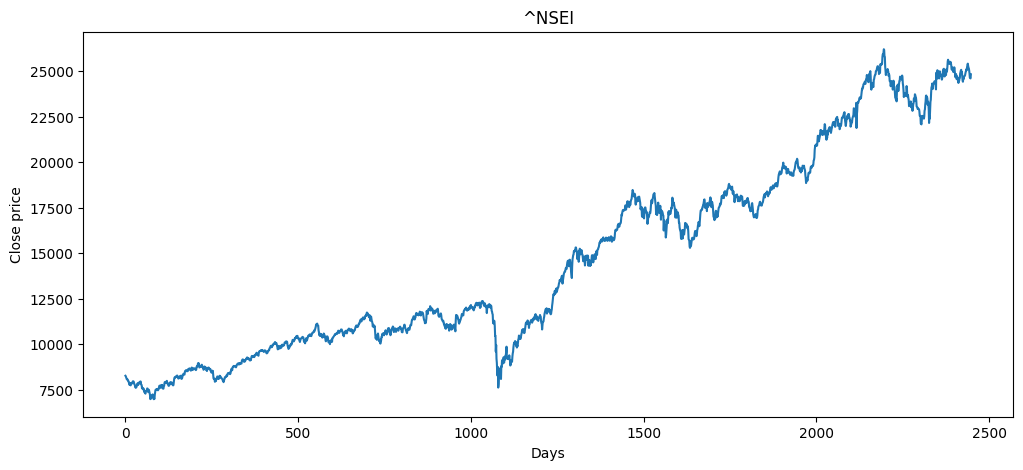

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

## 3. Feature Engineering

In [ ]:
features = ['Close', 'RSI', 'MACD', 'MACD_Signal']
data_to_process = df[features]

In [ ]:
train_size = int(len(data_to_process) * 0.7)
data_training = data_to_process.iloc[:train_size]
data_testing = data_to_process.iloc[train_size:]

In [ ]:
df.head(102)

Price,index,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal,MA_100
Ticker,,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,
0,0,8260.549805,8336.299805,8252.049805,8333.650391,133900,63.648657,38.123565,25.070576,NaN
1,1,8232.900391,8241.950195,8217.049805,8230.349609,156700,57.820192,36.305421,27.317545,NaN
2,2,8171.200195,8209.099609,8131.799805,8188.899902,188900,49.435055,29.545259,27.763088,NaN
3,3,8111.750000,8179.600098,8098.000000,8175.450195,217500,48.428844,19.169672,26.044405,NaN
4,4,8065.799805,8146.100098,8044.399902,8123.549805,199500,38.647577,7.156651,22.266854,NaN
...,...,...,...,...,...,...,...,...,...,...
97,97,7604.350098,7613.600098,7517.899902,7534.649902,237400,81.651408,68.648713,34.855704,NaN
98,98,7704.250000,7713.549805,7617.700195,7619.200195,196800,87.164468,82.886509,44.461865,NaN
99,99,7714.899902,7728.200195,7643.799805,7695.549805,208900,83.270289,93.946467,54.358785,7610.917495


## 4. Data Preprocessing

In [ ]:
df.shape

(2448, 10)

In [ ]:
# Spliting data into Traning & Testing datasets
train_size = int(len(data_to_process) * 0.7)
data_training = data_to_process.iloc[:train_size]
data_testing = data_to_process.iloc[train_size:]

In [ ]:
# Scaling down data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_training_array = scaler.fit_transform(data_training)

In [ ]:
data_training_array.shape

(1713, 4)

## 5. Sequence Creation

In [ ]:
x_train = []
y_train = []
time_step = 100

for i in range(time_step, data_training_array.shape[0]):
    x_train.append(data_training_array[i-time_step: i])
    # Predict the 'Close' price, which is the first column (index 0)
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train

array([[[0.11210666, 0.6132109 , 0.7293709 , 0.70881105],
        [0.10970371, 0.55047354, 0.72810064, 0.71063458],
        [0.10434148, 0.46021625, 0.7233776 , 0.71099616],
        ...,
        [0.0550778 , 0.8069918 , 0.75069751, 0.71675218],
        [0.06375988, 0.86633416, 0.76064485, 0.72454806],
        [0.06468544, 0.82441737, 0.76837197, 0.73257992]],

       [[0.10970371, 0.55047354, 0.72810064, 0.71063458],
        [0.10434148, 0.46021625, 0.7233776 , 0.71099616],
        [0.0991748 , 0.44938543, 0.71612862, 0.70960136],
        ...,
        [0.06375988, 0.86633416, 0.76064485, 0.72454806],
        [0.06468544, 0.82441737, 0.76837197, 0.73257992],
        [0.0648245 , 0.7805737 , 0.77376716, 0.7402588 ]],

       [[0.10434148, 0.46021625, 0.7233776 , 0.71099616],
        [0.0991748 , 0.44938543, 0.71612862, 0.70960136],
        [0.09518137, 0.34410027, 0.70773564, 0.70653569],
        ...,
        [0.06468544, 0.82441737, 0.76837197, 0.73257992],
        [0.0648245 , 0.780573

In [ ]:
y_train

array([0.0648245 , 0.05601206, 0.05443902, ..., 0.89897837, 0.89257758,
       0.87020324])

In [ ]:
x_train.shape

(1613, 100, 4)

In [ ]:
y_train.shape

(1613,)

In [ ]:
x_train.ndim

3

In [ ]:
y_train.ndim

1

## 6. Model Building

In [ ]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [ ]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [ ]:
model = Sequential()

model.add(Input(shape=(100, x_train.shape[2])))
model.add(LSTM(units=128, activation='tanh', return_sequences=True)) # Give Sequence of output
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

## 7. Model Training

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

model.save('stock_prediction_model_with_indicators.keras')

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0514
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.8337e-04
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.3706e-04
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 6.0356e-04
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.3423e-04
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.9638e-04
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.3474e-04
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9988e-04
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9971e-04
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9830e-04
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.1259e-04
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.0817e-04
Epoch 13/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.8448e-04
Epoch 14/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.5755e-04
Epoch 15/50
51/51 ━

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 128)       │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,467 (1.36 MB)

 Trainable params: 119,155 (465.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 238,312 (930.91 KB)

In [ ]:
# Save the trained model
model.save('stock_prediction_model.keras')

## 8. Preparing Test Data

In [ ]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [ ]:
past_100_days

Price,Close,RSI,MACD,MACD_Signal
Ticker,^NSEI,,,
1613,15809.400391,20.091250,-341.173945,-288.222303
1614,16266.150391,34.592710,-313.051424,-293.188128
1615,16214.700195,34.364830,-291.554861,-292.861474
1616,16125.150391,38.634367,-278.533836,-289.995947
1617,16025.799805,36.991251,-273.083406,-286.613438
...,...,...,...,...
1708,17274.300781,36.114470,-135.205725,-61.698621
1709,17331.800781,39.334603,-116.175346,-72.593966
1710,17314.650391,45.149008,-101.309692,-78.337111


In [ ]:
input_data = scaler.transform(final_df)
input_data

array([[0.76816045, 0.1443607 , 0.46437196, 0.45455801],
       [0.80785557, 0.30045384, 0.48401996, 0.45052799],
       [0.80338415, 0.29800095, 0.49903869, 0.45079308],
       ...,
       [1.53516499, 0.37854429, 0.71093681, 0.74433475],
       [1.53309652, 0.32225807, 0.69096001, 0.73042513],
       [1.55266825, 0.4073724 , 0.68799407, 0.7186084 ]])

In [ ]:
input_data.shape

(835, 4)

In [ ]:
x_test = []
y_test = []

for i in range(time_step, input_data.shape[0]):
    x_test.append(input_data[i-time_step:i])
    y_test.append(input_data[i, 0]) # The actual scaled 'Close' price

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test

array([[[0.76816045, 0.1443607 , 0.46437196, 0.45455801],
        [0.80785557, 0.30045384, 0.48401996, 0.45052799],
        [0.80338415, 0.29800095, 0.49903869, 0.45079308],
        ...,
        [0.89897837, 0.41408142, 0.63195484, 0.62489047],
        [0.89257758, 0.37347945, 0.63679386, 0.62228598],
        [0.87020324, 0.26922735, 0.62698807, 0.61792433]],

       [[0.80785557, 0.30045384, 0.48401996, 0.45052799],
        [0.80338415, 0.29800095, 0.49903869, 0.45079308],
        [0.79560158, 0.34395808, 0.50813592, 0.45311861],
        ...,
        [0.89257758, 0.37347945, 0.63679386, 0.62228598],
        [0.87020324, 0.26922735, 0.62698807, 0.61792433],
        [0.88237457, 0.32810269, 0.62797409, 0.61466408]],

       [[0.80338415, 0.29800095, 0.49903869, 0.45079308],
        [0.79560158, 0.34395808, 0.50813592, 0.45311861],
        [0.78696724, 0.32627165, 0.5119439 , 0.45586368],
        ...,
        [0.87020324, 0.26922735, 0.62698807, 0.61792433],
        [0.88237457, 0.328102

## 9. Making Prediction

In [ ]:
y_predicted = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [ ]:
y_predicted

array([[0.8634628 ],
       [0.8651464 ],
       [0.8619735 ],
       [0.8749757 ],
       [0.8912436 ],
       [0.90081966],
       [0.90848815],
       [0.9126422 ],
       [0.9091707 ],
       [0.92667043],
       [0.9182844 ],
       [0.9231993 ],
       [0.9317882 ],
       [0.9502599 ],
       [0.9739691 ],
       [0.9672921 ],
       [0.9677479 ],
       [0.9655476 ],
       [0.9680791 ],
       [0.964918  ],
       [0.95624274],
       [0.97467625],
       [0.98304105],
       [0.98874533],
       [0.99743176],
       [0.9908129 ],
       [0.98564535],
       [0.9668838 ],
       [0.96858966],
       [0.97895306],
       [0.9969543 ],
       [0.99961734],
       [1.0002139 ],
       [1.0070417 ],
       [1.022934  ],
       [1.018383  ],
       [1.0092533 ],
       [1.0079165 ],
       [1.0048933 ],
       [1.0029168 ],
       [1.007735  ],
       [1.005914  ],
       [0.99828243],
       [1.00297   ],
       [1.0001602 ],
       [0.9821291 ],
       [0.9705478 ],
       [0.981

In [ ]:
y_test

array([0.88237457, 0.8728799 , 0.88777151, 0.89873072, 0.91395248,
       0.91615131, 0.92064438, 0.92171782, 0.93514066, 0.92867469,
       0.93567942, 0.94001191, 0.95960079, 0.971177  , 0.96574085,
       0.96312055, 0.96872186, 0.97616554, 0.9721851 , 0.96099131,
       0.98893216, 0.98714631, 0.99359921, 0.99414238, 0.9884282 ,
       0.98527779, 0.97244141, 0.97976339, 0.98176668, 1.0006126 ,
       1.00310254, 1.00744793, 1.012254  , 1.02444705, 1.02915314,
       1.01903705, 1.01946734, 1.01440055, 1.00725239, 1.0114978 ,
       1.00169895, 1.00174681, 1.0113805 , 1.01592585, 0.99459865,
       0.98191877, 0.99508088, 0.99202621, 0.97584388, 0.96960825,
       0.94175007, 0.9598094 , 0.97003855, 0.96918678, 0.97513996,
       0.96769204, 0.97570045, 0.97875105, 0.9622732 , 0.95785839,
       0.94632562, 0.96733558, 0.95107958, 0.94947603, 0.94621699,
       0.95476875, 0.94940219, 0.96317283, 0.97291075, 0.96791355,
       0.96094361, 0.96884356, 0.96882184, 0.94915013, 0.92415

In [ ]:
dummy_array = np.zeros(shape=(len(y_predicted), len(features)))
dummy_array[:, 0] = y_predicted.flatten()

In [ ]:
y_predicted_final = scaler.inverse_transform(dummy_array)[:, 0]

In [ ]:
y_predicted_final

array([16905.99228911, 16925.3644666 , 16888.8559432 , 17038.46462394,
       17225.65036352, 17335.83708143, 17424.07424302, 17471.87234418,
       17431.92777288, 17633.28772445, 17536.79444616, 17593.34726818,
       17692.17513871, 17904.71904901, 18177.52753608, 18100.69860222,
       18105.94389052, 18080.62618423, 18109.75440592, 18073.38167844,
       17973.56002879, 18185.66431699, 18281.91343699, 18347.54949623,
       18447.49939757, 18371.3398415 , 18311.8797526 , 18096.00061256,
       18115.62929342, 18234.87524423, 18442.00583595, 18472.6477019 ,
       18479.51156766, 18558.07567142, 18740.93926052, 18688.57416475,
       18583.52300107, 18568.14102852, 18533.35532995, 18510.612945  ,
       18566.05333794, 18545.09961825, 18457.28767616, 18511.22471241,
       18478.89431354, 18271.42011704, 18138.1604403 , 18262.01179265,
       18200.67456539, 18052.83534646, 18003.87680757, 17765.78749279,
       17838.61250496, 17928.33381978, 17885.70419308, 17950.29709287,
      

In [ ]:
dummy_y_test = np.zeros(shape=(len(y_test), len(features)))
dummy_y_test[:, 0] = y_test.flatten()
y_test_actual = scaler.inverse_transform(dummy_y_test)[:, 0]

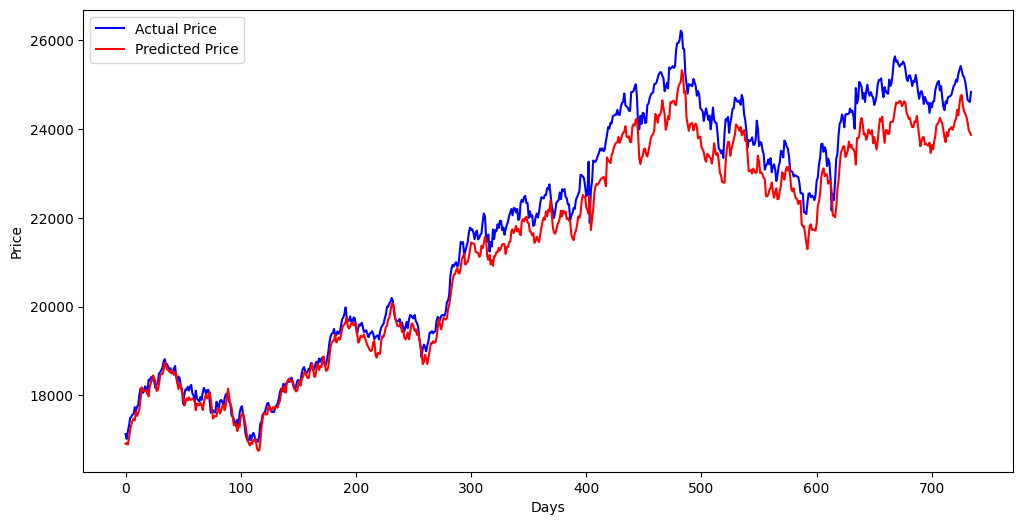

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, 'b', label='Actual Price')
plt.plot(y_predicted_final, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

(22000.0, 26000.0)

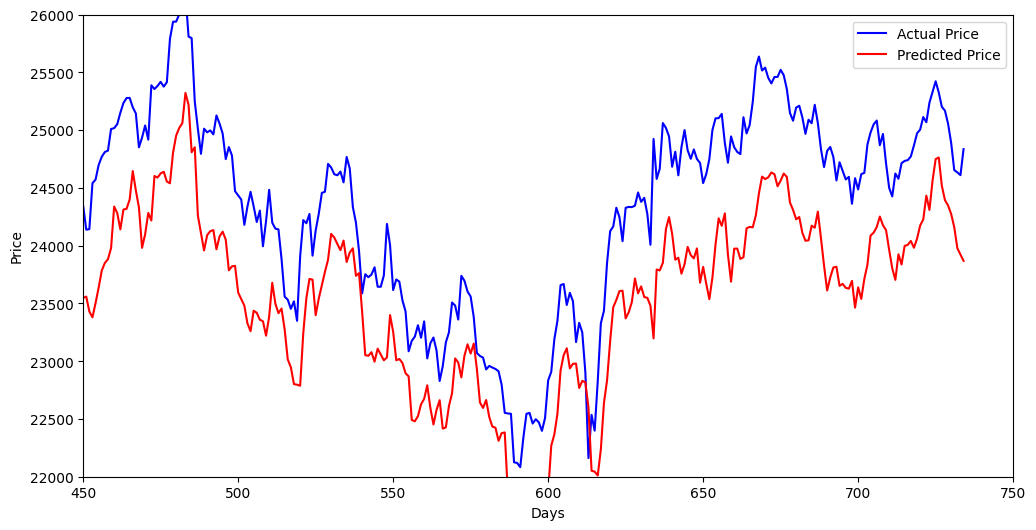

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, 'b', label = 'Actual Price')
plt.plot(y_predicted_final, 'r', label = 'Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(22000, 26000)

## 10. Model Evaluation

In [ ]:
# MSE
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squred Error (MSE): {mse}")

Mean Squred Error (MSE): 0.0025638166980950193


In [ ]:
# Root MSE - RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squred Error (RMSE): {rmse}")

Root Mean Squred Error (RMSE): 0.05063414557484919


In [ ]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.9542423096032167


In [ ]:
print(f"Model Confidence (R-squared): {(r2 * 100):.2f}%")

Model Confidence (R-squared): 95.42%


In [ ]:
# Temp predictions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

model = keras.models.load_model('/content/stock_prediction_model.keras')

In [ ]:
from datetime import datetime, timedelta

now = datetime.now()
time_delta = timedelta(days=150)
start = now - time_delta
end = now

print(f"From: {start} to {end}")

From: 2025-05-05 18:17:55.810646 to 2025-10-02 18:17:55.810646


In [ ]:
ticker = "^NSEI"
df = yf.download(ticker, start, end)
df.head()

/tmp/ipython-input-3960618362.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2025-05-05,24461.150391,24526.400391,24400.650391,24419.500000,291500
2025-05-06,24379.599609,24509.650391,24331.800781,24500.750000,302400
2025-05-07,24414.400391,24449.599609,24220.000000,24233.300781,330100
2025-05-08,24273.800781,24447.250000,24150.199219,24431.500000,411400
2025-05-09,24008.000000,24164.250000,23935.750000,23935.750000,335600


In [ ]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2025-09-25,24890.849609,25092.699219,24878.300781,25034.500000,342500
2025-09-26,24654.699219,24868.599609,24629.449219,24818.550781,291500
2025-09-29,24634.900391,24791.300781,24606.199219,24728.550781,394400
2025-09-30,24611.099609,24731.800781,24587.699219,24691.949219,303000
2025-10-01,24836.300781,24867.949219,24605.949219,24620.550781,308900


In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])  # Use only the 'Close' column

# Prepare the input for prediction
x_input = np.array([scaled_data[-100:]])  # Last 100 rows
x_input = x_input.reshape(1, 100, 1)  # Reshape to (1, 100, 1)

# Predict today's price
y_predicted = model.predict(x_input)

# Inverse transform the prediction to get the actual price
y_predicted = scaler.inverse_transform(y_predicted)

print(f"Predicted Price for {end}: {y_predicted.flatten()[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Predicted Price for 2025-10-02 18:17:55.810646: 24356.158203125
